# Mnist Fashion Dataset Classification using Deep Learning

### Importing important modules
    tensorflow: For implementing and training deep learning layers
    numpy: For mathematical manipulations
    matplotlib.pyplot: To plot images and important features

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Loading Fashion-mnist dataset

It's a dataset of Zalando's article images. Zalando seeks to replace original mnist databse of handwritten database.

This is somewhat equivalent to mnist's original handwritten database, with the same image size of 28x28. However, it is a bit difficult dataset, since some fashion elements look similar.

It contains of ten labels:

| No. | Label      |
|-----|------------|
| 0   | T-shirt    |
| 1   | Trousers   |
| 2   | Pullover   |
| 3   | Dress      |
| 4   | Coat       |
| 5   | Sandal     |
| 6   | Shirt      |
| 7   | Sneaker    |
| 8   | Bag        |
| 9   | Ankle boot |

In [2]:
# loading dataset
(train_x, train_y), (testx, testy) = tf.keras.datasets.fashion_mnist.load_data()
# naming the labels
label_names = [ "T-shirt", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]
train_x.shape

(60000, 28, 28)

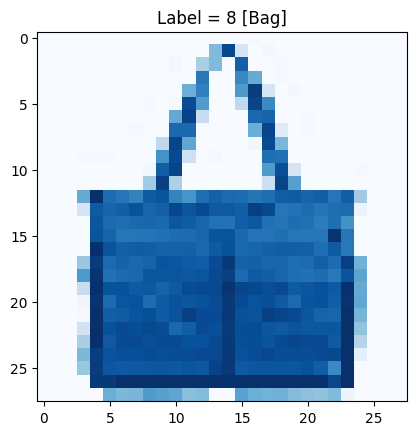

In [3]:
def choose_random(x_data, y_data):
    n = np.random.randint(x_data.shape[0])
    return tf.expand_dims(x_data[n], axis=0), y_data[n]

# show a random data (prevent from going into the global scope)
def _():
    xx, yy = choose_random(train_x, train_y)
    name = label_names[yy]

    plt.imshow(xx[0], cmap="Blues")
    plt.title(f"Label = {yy} [{name}]")

_()


### Implementing a model

Taking input, flattening it, passing it through several dense layer, halving neurons each time, and using Softmax to get an output.

In [4]:
from tensorflow.keras.layers import Input, Flatten, Dense, Softmax, Rescaling
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [5]:
the_input = Input(shape=(28, 28), name = "Input")

flattening_layer = Flatten(input_shape=(28,28))(the_input)
rescaling_layer = Rescaling((1/128))(flattening_layer)
activated_dense_0 = Dense(units=28*28, activation='gelu', name="Dense_0")(rescaling_layer)
activated_dense_1 = Dense(units= 512, activation='gelu', name="Dense_1")(activated_dense_0)
activated_dense_2 = Dense(units= 256, activation='gelu', name="Dense_2")(activated_dense_1)
activated_dense_3 = Dense(units= 128, activation='gelu', name="Dense_3")(activated_dense_2)
activated_dense_4 = Dense(units= 64, activation='gelu', name="Dense_4")(activated_dense_3)
activated_dense_5 = Dense(units= 32, activation='gelu', name="Dense_5")(activated_dense_4)

final_layer = Dense(units=10, name="Final_Dense")(activated_dense_5)

# actually this layer is kind of redundant we could use the trained model for predicting simple cases
output_layer = Softmax(name="Output_layer")(final_layer)

train_model = Model(the_input, final_layer)
train_model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
    )

use_model = Model(the_input, output_layer)
train_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 rescaling (Rescaling)       (None, 784)               0         
                                                                 
 Dense_0 (Dense)             (None, 784)               615440    
                                                                 
 Dense_1 (Dense)             (None, 512)               401920    
                                                                 
 Dense_2 (Dense)             (None, 256)               131328    
                                                                 
 Dense_3 (Dense)             (None, 128)               32896 

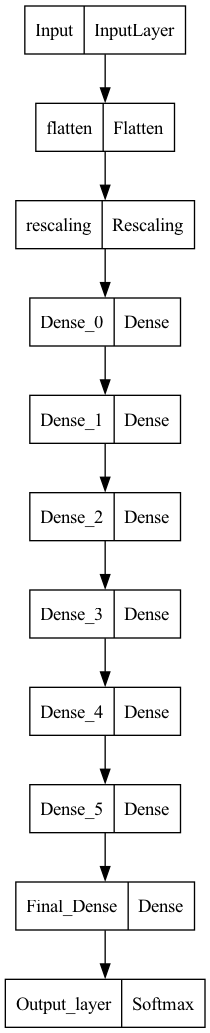

In [6]:
tf.keras.utils.plot_model(use_model)

### Training the model

The model is so good that even training it for 3 epoch gives accuracy of

In [7]:
train_model.fit(train_x, train_y, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4990 - accuracy: 0.8212
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3768 - accuracy: 0.8640
Epoch 3/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3390 - accuracy: 0.8764


### Evaluating the performance of the model in a train dataset

In [8]:
train_model.evaluate(testx, testy, verbose=2)

313/313 - 1s - loss: 0.4077 - accuracy: 0.8543 - 638ms/epoch - 2ms/step


[0.4077204763889313, 0.8543000221252441]

1/1 [==============================] - 0s 101ms/step
6


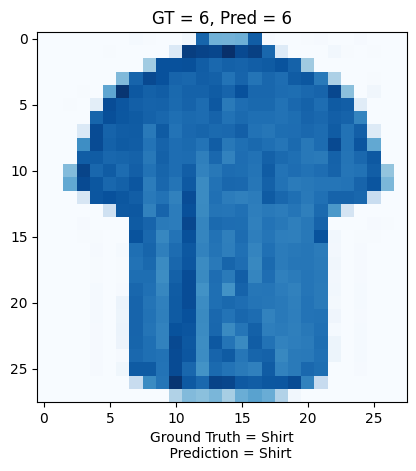

In [9]:
def _():
    xx, yy = choose_random(testx, testy)
    y_pred = use_model.predict(xx)
    y = np.argmax(y_pred)
    print(y)
    
    plt.imshow(xx[0], cmap='Blues')
    plt.title(f"GT = {yy}, Pred = {y}")
    plt.xlabel(f'''Ground Truth = {label_names[yy]}
    Prediction = {label_names[y]}''')
    # plt.xlabel(f"Prediction = {label_names[y]}")
    plt.show()

_()

In [10]:
def choose_random_and_test_model(log_output=True):
    xx, yy = choose_random(testx, testy)
    prediction_label = label_names[np.argmax(use_model.predict(xx))]
    gt_label = label_names[yy]
    correct_prediction =  prediction_label == gt_label
    colour = 'blue' if correct_prediction else 'red'
    
    plt.imshow(xx[0], cmap='Blues')
    if log_output:
        print(f"Ground Truth was: {gt_label}")
        print(f"Model predicted : {prediction_label}")
        print(f"{'Correctly identified' if correct_prediction else 'Wrongly identified'}")
        plt.show()
    else:
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f"Ground Truth = {gt_label}\nPrediction = {prediction_label}", color=colour)



1/1 [==============================] - 0s 21ms/step


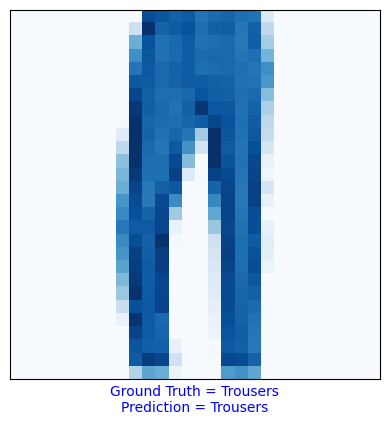

In [11]:
choose_random_and_test_model(False)
# plt.figure(figsize=(16,16))

1/1 [==============================] - 0s 17ms/step


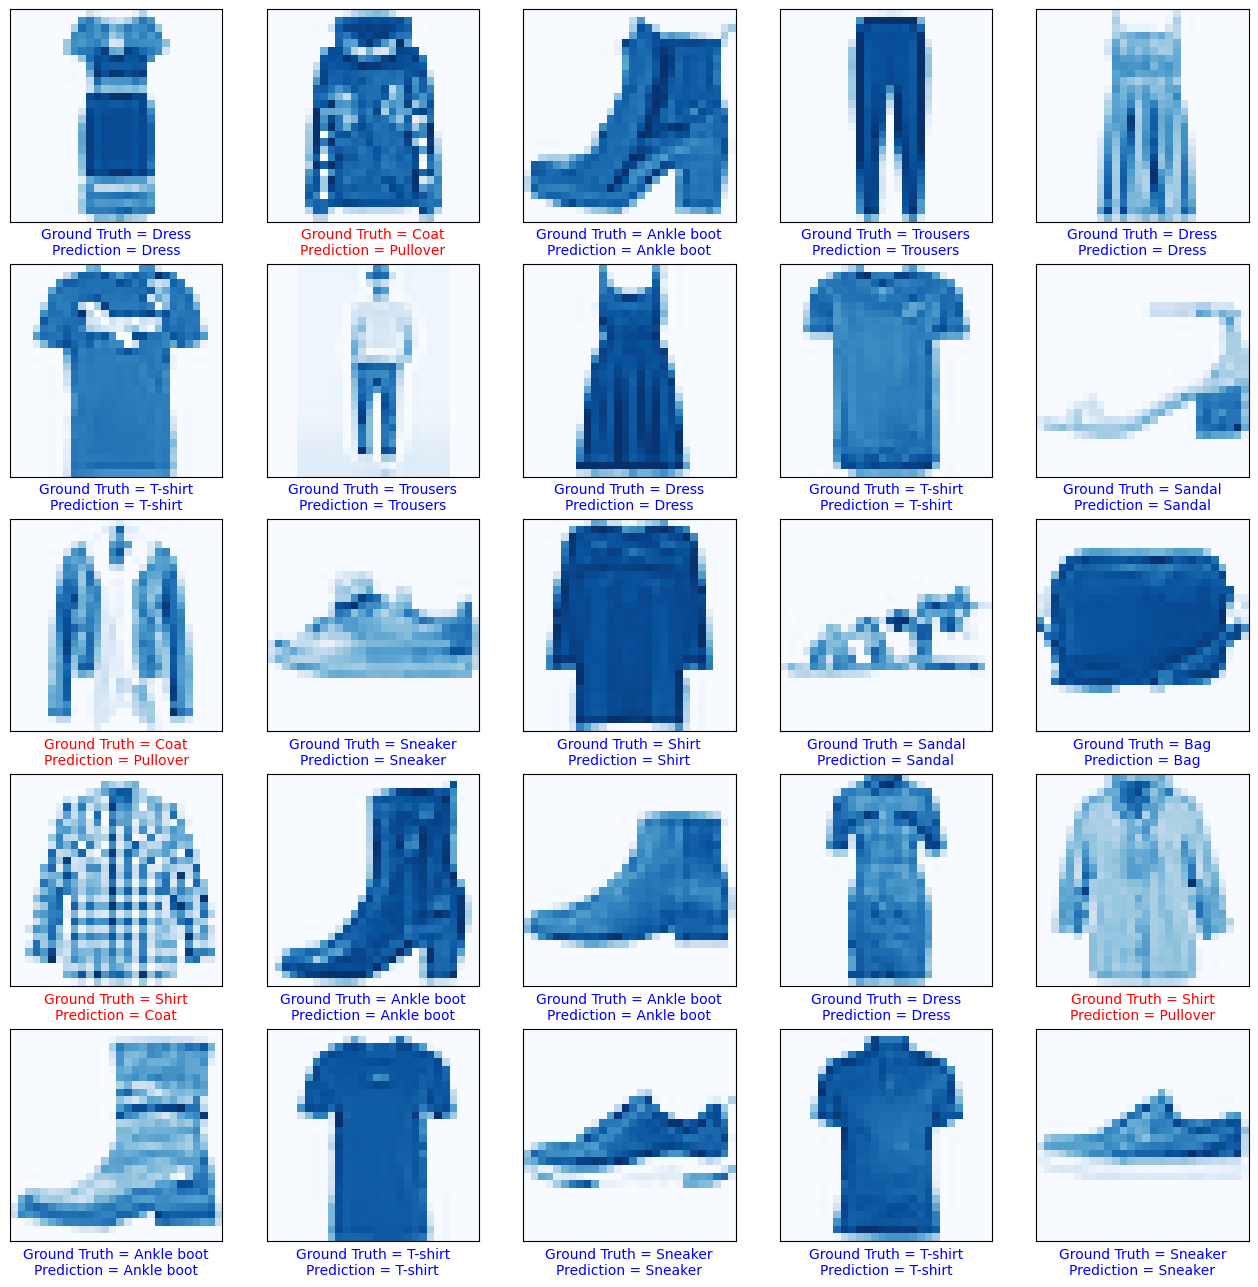

In [12]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5, i+1)
    choose_random_and_test_model(False)
plt.savefig("Output.png")